In [27]:
import pandas as pd
import numpy as np

unified_data_path = '/home/maria/LuckyMouse4/data/unified_neuron_data.pkl'

df = pd.read_pickle(unified_data_path)
visp_neurons = df[(df['brain_area'] == 'VISp') & (df['status'] == 'non_significant')]

In [7]:
visp_neurons

,neuron_idx,r2,status,brain_area,vector
0,0,-0.0013,non_significant,VISp,"[-0.055515847015264144, -0.06281640709097443, ..."
1,1,-0.0106,non_significant,VISp,"[-0.03132956171357126, 0.007543800166609883, -..."
2,2,-0.0200,non_significant,VISp,"[-0.06289737956900776, -0.04065543969096044, -..."
3,3,-0.0193,non_significant,VISp,"[0.09928743044593512, 0.07726972462597245, -0...."
4,4,-0.0211,non_significant,VISp,"[-0.07683160972148292, -0.020394622810971298, ..."
...,...,...,...,...,...
39088,39088,-0.0066,non_significant,VISp,"[0.0384456578237434, -0.017471219823055002, 0...."
39090,39090,-0.0350,non_significant,VISp,"[0.02240184986344147, 0.024947582124463425, -0..."
39091,39091,-0.0142,non_significant,VISp,"[0.07051399671341814, 0.030352016726403946, -0..."
39092,39092,-0.0011,non_significant,VISp,"[0.06113249959726465, -0.03887729933560331, -0..."


In [29]:
vectors = np.vstack(visp_neurons['vector'].to_numpy())
vectors.shape
vectors.shape

(8612, 1000)

In [20]:
vectors

array([array([-5.55158470e-02, -6.28164071e-02, -4.46169853e-02, -3.06348153e-02,
              -3.06806694e-02,  3.30403859e-02,  6.44983563e-02, -2.08779650e-02,
               3.44926929e-02, -5.64933605e-02, -1.58082539e-02, -5.29221020e-02,
               3.54363375e-02, -1.64304337e-02,  2.93711208e-02,  3.03420820e-03,
              -5.05977275e-02, -4.02957159e-02,  3.40829895e-02, -1.68587795e-02,
               3.49597734e-02,  6.58833181e-02, -2.26052249e-02, -1.53933752e-02,
              -7.84129006e-04,  5.42481764e-02, -1.23874202e-02,  8.79883978e-02,
               9.25204630e-02,  3.52686680e-02,  8.37212034e-02,  8.30958852e-02,
               6.88919671e-02,  5.70809824e-02,  6.88531652e-02,  9.51319496e-02,
              -6.65729334e-02,  1.24282070e-02,  5.45226855e-03, -4.41342297e-02,
               1.02323242e-01, -3.49277466e-02, -3.23997156e-02, -1.01274695e-01,
              -6.73827865e-02, -1.12170855e-01, -6.83742395e-03, -7.49574250e-02,
              -2

In [21]:
print(vectors.shape)

(8612,)


Found 8612 non-significant VISp neurons
Vectors shape: (8612, 1000)


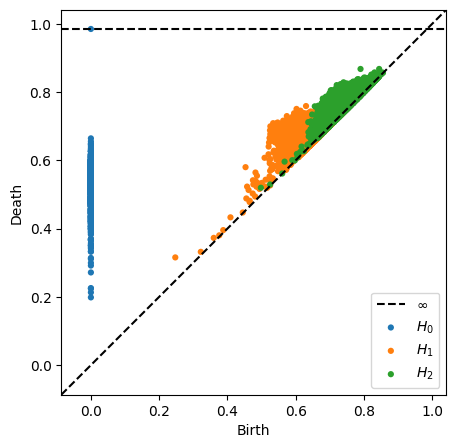

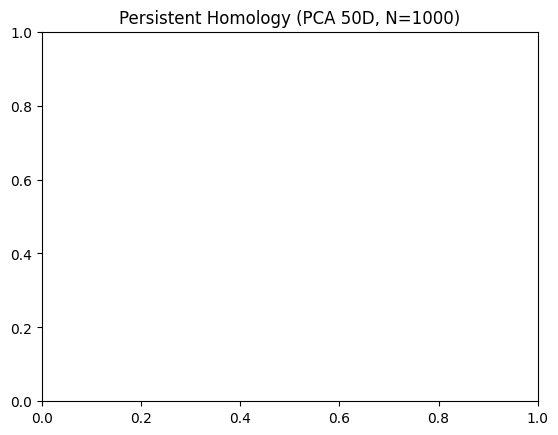

In [6]:
import pandas as pd
import numpy as np
from ripser import ripser
from persim import plot_diagrams
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

def load_non_significant_visp(filepath):
    df = pd.read_pickle(filepath)
    visp_neurons = df[(df['brain_area'] == 'VISp') & (df['status'] == 'non_significant')]
    vectors = np.vstack(visp_neurons['vector'].to_numpy())
    return visp_neurons, vectors
'''
def load_non_significant_visp(filepath):
    df = pd.read_pickle(filepath)
    visp_neurons = df[(df['brain_area'] == 'VISp') & (df['status'] == 'significant')]
    vectors = np.vstack(visp_neurons['vector'].to_numpy())
    return visp_neurons, vectors'''
def compute_topology(vectors, subsample_size=2000, pca_dim=50):
    # Optionally subsample to reduce computational load
    if vectors.shape[0] > subsample_size:
        idx = np.random.choice(vectors.shape[0], subsample_size, replace=False)
        vectors = vectors[idx]

    # Normalize data
    dat = StandardScaler().fit_transform(vectors)

    # PCA reduction
    dat_pca = PCA(n_components=pca_dim).fit_transform(dat)

    # Compute pairwise distances
    D_pca = pairwise_distances(dat_pca, metric='cosine')

    # Compute persistent homology
    dgms_pca = ripser(D_pca, distance_matrix=True, maxdim=2)['dgms']

    # Plot results
    plt.figure(figsize=(6, 5))
    plot_diagrams(dgms_pca, show=True)
    plt.title(f"Persistent Homology (PCA {pca_dim}D, N={vectors.shape[0]})")
    plt.show()

if __name__ == "__main__":
    unified_data_path = '/home/maria/LuckyMouse4/data/unified_neuron_data.pkl'
    visp_non_sig, vectors = load_non_significant_visp(unified_data_path)
    print(f"Found {len(visp_non_sig)} non-significant VISp neurons")
    print("Vectors shape:", vectors.shape)

    compute_topology(vectors, subsample_size=1000, pca_dim=50)